In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ratings_df = pd.read_csv("./../MovieLens/ratings.csv") # large dataset
ratings_2_df = pd.read_csv("./../MovieLens/ratings_2.csv") # basic dataset
# ratings_20m = pd.read_csv("./../MovieLens/20m/ratings.csv") # 20M dataset
# movies_df = pd.read_csv("./MovieLens/movies.csv")
# links_df = pd.read_csv("./MovieLens/links.csv")
# tags_df = pd.read_csv("./MovieLens/tags.csv")

## Large dataset

In [24]:
ratings_count = ratings_df.groupby('userId', as_index=False).count().sort_values('movieId', ascending=False)

In [111]:
ratings_count[(ratings_count['movieId']>30) & (ratings_count['movieId']<10000)].describe()

,userId,movieId,rating,timestamp
count,141188.000000,141188.000000,141188.000000,141188.000000
mean,141855.829886,182.083059,182.083059,182.083059
std,81683.157968,269.576139,269.576139,269.576139
min,4.000000,31.000000,31.000000,31.000000
25%,71028.750000,52.000000,52.000000,52.000000
50%,142145.500000,95.000000,95.000000,95.000000
75%,212478.250000,199.000000,199.000000,199.000000
max,283228.000000,9279.000000,9279.000000,9279.000000


### Random sampling corresponding 5%

In [5]:
sample_users_t = ratings_count.sample(frac=0.05)

#### Sorting sample and getting first 200 users

In [6]:
sample_users_t = sample_users_t.sort_values('movieId', ascending=False)
sample_users_t = sample_users_t[:200]
sample_users_t.shape

(200, 4)

#### Picking ratings only users sample

In [7]:
sample_ratings_t = ratings_df.loc[ratings_df['userId'].isin(sample_users_t['userId'].values)]

### First 200 users without randomization

In [8]:
users_t = ratings_count[:200]
users_t.shape

(200, 4)

#### Picking ratings only users sample

In [9]:
ratings_t = ratings_df.loc[ratings_df['userId'].isin(users_t['userId'].values)]

### Writing new datasets

In [10]:
ratings_t.to_csv(path_or_buf='./MovieLens/ratings_large_sample.csv', index=False)
users_t.to_csv(path_or_buf='./MovieLens/users_large_sample.csv', index=False, columns=['userId'])
sample_ratings_t.to_csv(path_or_buf='./MovieLens/ratings_large_sample_05.csv', index=False)
sample_users_t.to_csv(path_or_buf='./MovieLens/users_large_sample_05.csv', index=False, columns=['userId'])

## Basic dataset

In [3]:
# ratings_2_count = ratings_20m.groupby('userId', as_index=False).count().sort_values('movieId', ascending=False)
ratings_2_count = ratings_2_df.groupby('userId', as_index=False).count()

In [4]:
ratings_2_count[(ratings_2_count['movieId'] > 30) & (ratings_2_count['movieId'] < 4000)][['movieId']].mean()

movieId    197.070281
dtype: float64

In [5]:
ratings_2_count[(ratings_2_count['movieId'] < 100)].shape

(362, 4)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F63528E160>],
      dtype=object)

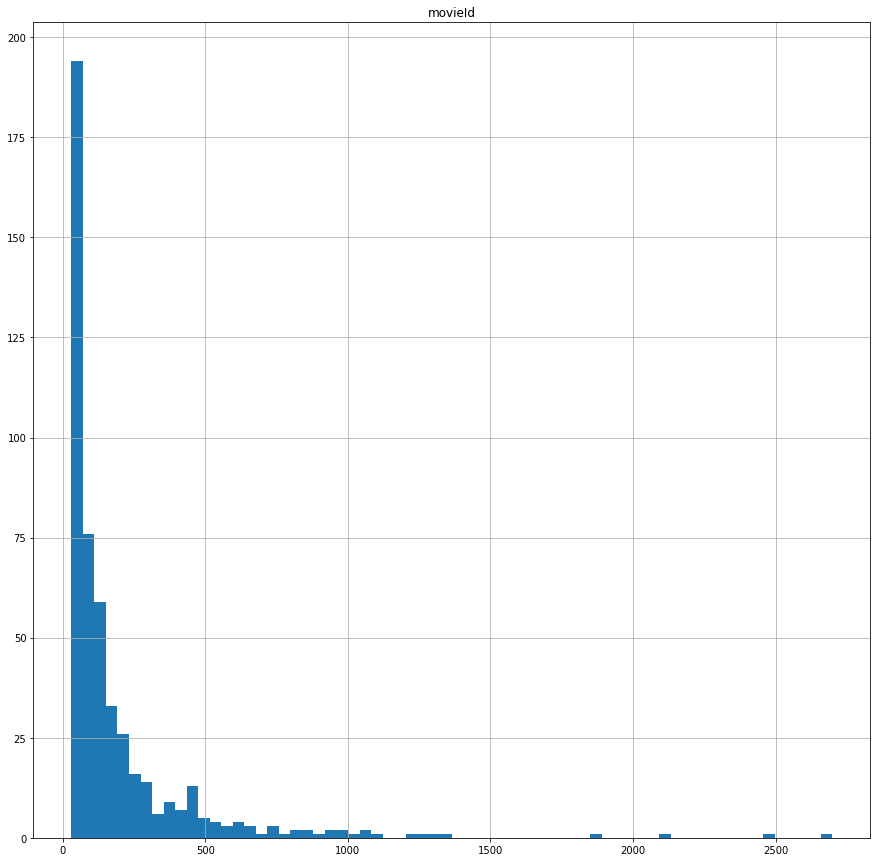

In [6]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
# axarr = ratings_2_count.hist(column='movieId', bins='auto', ax=ax)
# ratings_2_count[['movieId']].describe()

# axarr = ratings_2_count[(ratings_2_count['movieId']>30)].hist(bins='auto', column=['movieId'], ax=ax)
# for ax in axarr.flatten():
#     ax.set_xlabel("# Filmes")
#     ax.set_ylabel("# Usuários")
#     ax.set_title('Distribuição Usuários x Filmes')

ratings_2_count[(ratings_2_count['movieId'] > 30) & (ratings_2_count['movieId'] < 4000)][['movieId']].hist(bins='auto', ax=ax)

In [7]:
sectionA = ratings_2_count[(ratings_2_count['movieId']>30) & (ratings_2_count['movieId']<=60)]
sectionB = ratings_2_count[(ratings_2_count['movieId']>60) & (ratings_2_count['movieId']<=154)]
sectionC = ratings_2_count[ratings_2_count['movieId']>154]

In [9]:
cand = [1, 100, 101, 102, 103, 104, 105, 106, 107, 108, 11, 110, 111, 113, 114, 116, 117, 119, 12, 121, 123, 128, 129, 131, 132, 134, 136, 137, 139, 14, 140, 141, 142, 144, 146, 148, 149, 152, 153, 154, 155, 156, 16, 162, 165, 166, 167, 177, 178, 183, 19, 190, 191, 195, 196, 197, 202, 21, 211, 212, 213, 215, 22, 220, 221, 225, 227, 229, 230, 232, 233, 234, 235, 237, 238, 239, 242, 246, 247, 248, 249, 252, 253, 255, 256, 260, 261, 262, 268, 27, 271, 273, 274, 276, 279, 280, 285, 286, 287, 288, 29, 290, 291, 294, 298, 3, 300, 301, 302, 305, 306, 307, 309, 310, 312, 314, 315, 316, 319, 32, 325, 331, 332, 334, 338, 339, 34, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 357, 358, 359, 36, 361, 365, 366, 369, 370, 374, 375, 377, 380, 383, 385, 387, 389, 393, 395, 40, 400, 402, 404, 405, 408, 41, 410, 411, 412, 413, 414, 417, 418, 42, 420, 421, 425, 426, 427, 428, 429, 43, 434, 435, 436, 437, 438, 44, 441, 443, 445, 447, 448, 449, 45, 450, 451, 452, 455, 457, 46, 465, 466, 468, 469, 470, 473, 474, 475, 476, 477, 479, 48, 480, 481, 482, 486, 487, 488, 489, 491, 492, 493, 495, 498, 50, 501, 502, 503, 504, 506, 509, 511, 513, 514, 517, 52, 520, 521, 522, 523, 524, 526, 528, 534, 539, 540, 552, 554, 555, 558, 559, 561, 562, 567, 571, 577, 58, 581, 583, 588, 590, 591, 592, 593, 594, 597, 6, 600, 602, 605, 606, 61, 62, 63, 65, 66, 68, 69, 7, 71, 75, 76, 78, 79, 8, 80, 82, 83, 84, 86, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99]

In [19]:
section_users = list(sectionA['userId'].values)
sectionA[sectionA['userId'].isin([c for c in section_users if c in cand])]['rating'].min()

31

In [55]:
n=100
random_state=42
sectionA_ = sectionA.sample(n=n, random_state=random_state)
sectionB_ = sectionB.sample(n=n, random_state=random_state)
sectionC_ = sectionC.sample(n=n, random_state=random_state)

In [56]:
sectionA_['userId'].values

array([ 15943,  87147, 122620,  36638,  37211,  53423,  51483,  86036,
        28180,  98550, 108243, 104607,  75979,  54425,  75263,  95175,
        71524,   6043,  45202, 125578,  15499,  82074,  69368, 116049,
        70112,   1146,  97657,  22460, 112649, 112999,  38029,  63145,
        55473,  76174, 138053,  23827,  72634,  70167,   5956,  67641,
        78784,  32616,  98881,  83445,  57222,  85753,   6609, 131468,
        65509, 132546,  80306, 117888,  84909,  99141, 106077, 131573,
        97427, 118262,   4478,   1874,  11447, 132325,  26561,  25887,
        82950,  75075,  26798,  38247,  65487,  18568,  93225,  29587,
       120191,  96434,   8277,  10262, 134395, 130776,    122,  26426,
       105233, 110678, 105080,  51167,    391,  30012, 136840,  46349,
       107452, 135663,  81508, 116872,  43001, 130233,  55901, 135923,
       138318,  61926,  86888,  53064], dtype=int64)

In [63]:
users = np.concatenate((sectionA_['userId'].values, sectionB_['userId'].values, sectionC_['userId'].values))
users

array([ 15943,  87147, 122620,  36638,  37211,  53423,  51483,  86036,
        28180,  98550, 108243, 104607,  75979,  54425,  75263,  95175,
        71524,   6043,  45202, 125578,  15499,  82074,  69368, 116049,
        70112,   1146,  97657,  22460, 112649, 112999,  38029,  63145,
        55473,  76174, 138053,  23827,  72634,  70167,   5956,  67641,
        78784,  32616,  98881,  83445,  57222,  85753,   6609, 131468,
        65509, 132546,  80306, 117888,  84909,  99141, 106077, 131573,
        97427, 118262,   4478,   1874,  11447, 132325,  26561,  25887,
        82950,  75075,  26798,  38247,  65487,  18568,  93225,  29587,
       120191,  96434,   8277,  10262, 134395, 130776,    122,  26426,
       105233, 110678, 105080,  51167,    391,  30012, 136840,  46349,
       107452, 135663,  81508, 116872,  43001, 130233,  55901, 135923,
       138318,  61926,  86888,  53064,  31902,   2248,  39666,  82204,
        93708,  52063,  24156,   3497,  48118, 121882, 106718,  61977,
      

In [61]:
ratings = ratings_20m[ratings_20m['userId'].isin(users)]
ratings.shape

(83504, 3)

In [62]:
ratings.to_csv(path_or_buf='./../MovieLens/20m/ratings_20m_sample_section.csv', index=False, columns=['userId', 'movieId', 'rating'])

In [9]:
sample_users_u = ratings_2_count.sample(frac=0.5)
sample_users_u = sample_users_u.sort_values('movieId', ascending=False)
sample_users_u = sample_users_u[:200]
sample_users_u.head()

,userId,movieId,rating,timestamp
413,414,2698,2698,2698
598,599,2478,2478,2478
473,474,2108,2108,2108
273,274,1346,1346,1346
386,387,1027,1027,1027


In [11]:
sample_ratings_u = ratings_2_df.loc[ratings_2_df['userId'].isin(sample_users_u['userId'].values)]

In [15]:
users_u = ratings_2_count[:200]
users_u.shape

(200, 4)

In [16]:
ratings_u = ratings_2_df.loc[ratings_2_df['userId'].isin(users_u['userId'].values)]

In [18]:
# ratings_u.to_csv(path_or_buf='./MovieLens/ratings_basic_sample.csv', index=False)
# users_u.to_csv(path_or_buf='./MovieLens/users_basic_sample.csv', index=False, columns=['userId'])
sample_ratings_u.to_csv(path_or_buf='./MovieLens/ratings_basic_sample_05.csv', index=False)
sample_users_u.to_csv(path_or_buf='./MovieLens/users_basic_sample_05.csv', index=False, columns=['userId'])